In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin

In [90]:
#Task A part a
ticker = 'AMZN'
ticker = yfin.Ticker(ticker)
data = ticker.history(period='5y')

data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-08 00:00:00-05:00,159.000000,159.531998,157.110001,159.134995,70754000,0.0,0.0
2021-01-11 00:00:00-05:00,157.400497,157.819000,155.500000,155.710495,73668000,0.0,0.0
2021-01-12 00:00:00-05:00,156.000000,157.106995,154.300003,156.041504,70292000,0.0,0.0
2021-01-13 00:00:00-05:00,156.421997,159.497498,156.104004,158.294495,66424000,0.0,0.0
2021-01-14 00:00:00-05:00,158.376007,158.899994,156.029495,156.373505,61418000,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-31 00:00:00-05:00,232.910004,232.990005,230.119995,230.820007,24383700,0.0,0.0
2026-01-02 00:00:00-05:00,231.339996,235.460007,224.699997,226.500000,51456200,0.0,0.0
2026-01-05 00:00:00-05:00,228.839996,234.000000,227.179993,233.059998,49733300,0.0,0.0


<Axes: xlabel='Date', ylabel='Amazon Stock Prices'>

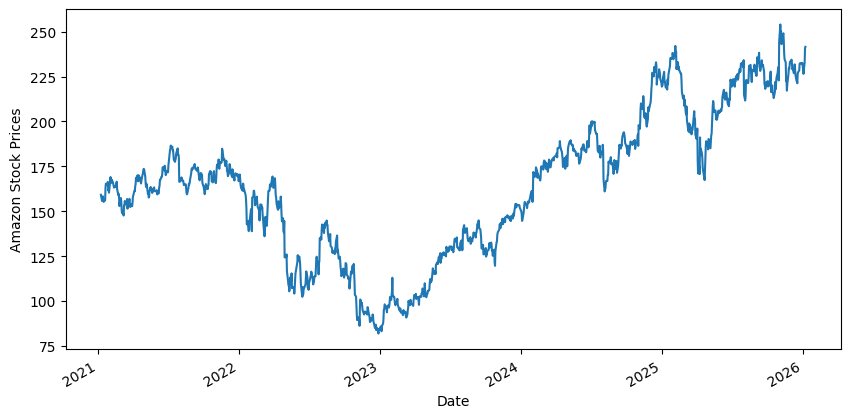

In [91]:
#plotting a simple line chart
plt.ylabel("Amazon Stock Prices")
data['Close'].plot(figsize=(10,5))

In [92]:
#Task A Question b
#Simple moving averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
#Exponential moving averages
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
#Relative strength index
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
average_gain = gain.rolling(window=14).mean()
averasge_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-01-08 00:00:00-05:00,159.000000,159.531998,157.110001,159.134995,70754000,0.0,0.0,NaN,NaN,159.134995,NaN
2021-01-11 00:00:00-05:00,157.400497,157.819000,155.500000,155.710495,73668000,0.0,0.0,NaN,NaN,158.808852,NaN
2021-01-12 00:00:00-05:00,156.000000,157.106995,154.300003,156.041504,70292000,0.0,0.0,NaN,NaN,158.545295,NaN
2021-01-13 00:00:00-05:00,156.421997,159.497498,156.104004,158.294495,66424000,0.0,0.0,NaN,NaN,158.521409,NaN
2021-01-14 00:00:00-05:00,158.376007,158.899994,156.029495,156.373505,61418000,0.0,0.0,NaN,NaN,158.316847,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-31 00:00:00-05:00,232.910004,232.990005,230.119995,230.820007,24383700,0.0,0.0,228.772501,231.436801,229.774434,48.034414
2026-01-02 00:00:00-05:00,231.339996,235.460007,224.699997,226.500000,51456200,0.0,0.0,228.478500,231.526201,229.462584,43.061674
2026-01-05 00:00:00-05:00,228.839996,234.000000,227.179993,233.059998,49733300,0.0,0.0,228.676000,231.828401,229.805194,61.561759


In [93]:
data = data.dropna()

In [94]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_20,MA_50,EMA_20,RSI
Date,,,,,,,,,,,
2021-09-15 00:00:00-04:00,172.126007,174.270996,170.100494,173.789505,59150000,0.0,0.0,169.522426,172.991860,171.512226,73.323646
2021-09-16 00:00:00-04:00,172.998001,174.627502,172.307007,174.412003,51672000,0.0,0.0,170.239976,172.783521,171.788395,74.259195
2021-09-17 00:00:00-04:00,174.420502,174.870499,172.606506,173.126007,92332000,0.0,0.0,170.926901,172.514631,171.915787,66.262391
2021-09-20 00:00:00-04:00,169.800003,170.949997,165.250504,167.786499,93382000,0.0,0.0,171.316351,172.151021,171.522521,41.380812
2021-09-21 00:00:00-04:00,168.750000,168.985001,166.619507,167.181503,55618000,0.0,0.0,171.510751,171.776101,171.109091,31.561354
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-31 00:00:00-05:00,232.910004,232.990005,230.119995,230.820007,24383700,0.0,0.0,228.772501,231.436801,229.774434,48.034414
2026-01-02 00:00:00-05:00,231.339996,235.460007,224.699997,226.500000,51456200,0.0,0.0,228.478500,231.526201,229.462584,43.061674
2026-01-05 00:00:00-05:00,228.839996,234.000000,227.179993,233.059998,49733300,0.0,0.0,228.676000,231.828401,229.805194,61.561759


In [95]:
# Initialising X and assigning the two feature variables
X = data[['EMA_20','MA_50']]

# Getting the head of the data
X.head()

,EMA_20,MA_50
Date,,
2021-09-15 00:00:00-04:00,171.512226,172.991860
2021-09-16 00:00:00-04:00,171.788395,172.783521
2021-09-17 00:00:00-04:00,171.915787,172.514631
2021-09-20 00:00:00-04:00,171.522521,172.151021
2021-09-21 00:00:00-04:00,171.109091,171.776101


In [96]:
# Setting-up the dependent variable
y = data['Close']

# Getting the head of the data
y.head()

,Close
Date,
2021-09-15 00:00:00-04:00,173.789505
2021-09-16 00:00:00-04:00,174.412003
2021-09-17 00:00:00-04:00,173.126007
2021-09-20 00:00:00-04:00,167.786499
2021-09-21 00:00:00-04:00,167.181503


In [97]:
#Task A Question c

# Setting the training set to 70% of the data
training = 0.7
t = int(training*len(data))

# Training the dataset
X_train = X[:t]
y_train = y[:t]

# Testing the dataset
X_test = X[t:]
y_test = y[t:]

In [98]:
X[:t]

,EMA_20,MA_50
Date,,
2021-09-15 00:00:00-04:00,171.512226,172.991860
2021-09-16 00:00:00-04:00,171.788395,172.783521
2021-09-17 00:00:00-04:00,171.915787,172.514631
2021-09-20 00:00:00-04:00,171.522521,172.151021
2021-09-21 00:00:00-04:00,171.109091,171.776101
...,...,...
2024-09-13 00:00:00-04:00,178.301385,179.939800
2024-09-16 00:00:00-04:00,178.928872,179.637600
2024-09-17 00:00:00-04:00,179.686123,179.389401


In [99]:
y[:t]

,Close
Date,
2021-09-15 00:00:00-04:00,173.789505
2021-09-16 00:00:00-04:00,174.412003
2021-09-17 00:00:00-04:00,173.126007
2021-09-20 00:00:00-04:00,167.786499
2021-09-21 00:00:00-04:00,167.181503
...,...
2024-09-13 00:00:00-04:00,186.490005
2024-09-16 00:00:00-04:00,184.889999
2024-09-17 00:00:00-04:00,186.880005


In [100]:
X[t:]

,EMA_20,MA_50
Date,,
2024-09-20 00:00:00-04:00,182.224062,178.863801
2024-09-23 00:00:00-04:00,183.334151,178.851601
2024-09-24 00:00:00-04:00,184.346138,178.876401
2024-09-25 00:00:00-04:00,185.125553,178.866601
2024-09-26 00:00:00-04:00,185.700263,178.931201
...,...,...
2025-12-31 00:00:00-05:00,229.774434,231.436801
2026-01-02 00:00:00-05:00,229.462584,231.526201
2026-01-05 00:00:00-05:00,229.805194,231.828401


In [101]:
y[t:]

,Close
Date,
2024-09-20 00:00:00-04:00,191.600006
2024-09-23 00:00:00-04:00,193.880005
2024-09-24 00:00:00-04:00,193.960007
2024-09-25 00:00:00-04:00,192.529999
2024-09-26 00:00:00-04:00,191.160004
...,...
2025-12-31 00:00:00-05:00,230.820007
2026-01-02 00:00:00-05:00,226.500000
2026-01-05 00:00:00-05:00,233.059998


In [102]:
#Reproducible Seed
import numpy as np
np.random.seed(42)

In [103]:
#Task A Question d

#Define Linear Regression Model
from sklearn.linear_model import LinearRegression

#Train Linear Regression Model
model = LinearRegression().fit(X_train,y_train)
print("Linear Regression Model Defined and Trained")

Linear Regression Model Defined and Trained


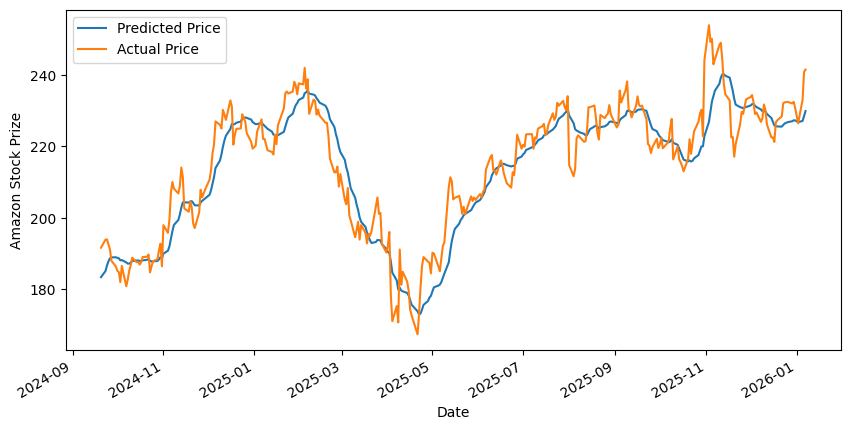

The model has a 86.49% accuracy.


In [104]:
#Task Question e
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Close'])

predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Amazon Stock Prize")
plt.show()

R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

In [105]:
#Task A Question f

#Extract alpha and beta values
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')


alpha = 2.6059713062371657
betas = [ 1.52272486 -0.5407804 ]


In [106]:
#Formulate Linear Regression Model
alpha = model.intercept_
beta1, beta2 = model.coef_

sign = "-" if beta2 < 0 else "+"

print(f"Linear Regression Model: ŷ = {alpha:.4f} + {beta1:.4f}(EMA_20) {sign} {abs(beta2):.4f}(MA_50)")

Linear Regression Model: ŷ = 2.6060 + 1.5227(EMA_20) - 0.5408(MA_50)


In [109]:
# Task A Question g – Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Features for Random Forest
X_rf = data[['MA_20', 'EMA_20', 'MA_50', 'RSI']]
y = data['Close']

# Use SAME 70/30 split as Linear Regression
t = int(0.7 * len(data))

X_train_rf = X_rf[:t]
y_train_rf = y[:t]
X_test_rf = X_rf[t:]
y_test_rf = y[t:]

# Define & train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)


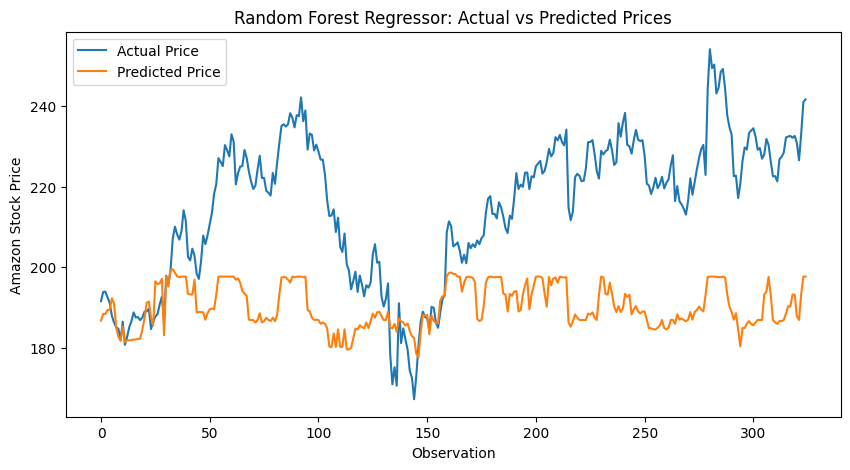

In [110]:
plt.figure(figsize=(10,5))
plt.plot(y_test_rf.values, label='Actual Price')
plt.plot(y_pred_rf, label='Predicted Price')
plt.title('Random Forest Regressor: Actual vs Predicted Prices')
plt.xlabel('Observation')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()


In [111]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))

r2_rf, mae_rf, rmse_rf


(-1.7069761703293773, 25.37686171546349, np.float64(29.422163854525763))